In [11]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda

In [36]:
# Load the conformational ensemble
state_name = 'state_a'
#state_name = 'state_i'
u = mda.Universe(f'data/unbiased/{state_name}.pdb',
                 f'data/unbiased/{state_name}.xtc')

In [37]:
# Load the reference structure
ref = mda.Universe('test/abfe/equil/pose0/full.pdb',
                   'test/abfe/equil/pose0/full.inpcrd', format='RESTRT')

In [38]:
gpcr_sel = 'protein and chainID R and name CA'
gpcr_atoms = u.select_atoms(gpcr_sel)
print(gpcr_atoms.n_atoms)

287


In [39]:
from MDAnalysis.analysis import rms, align

average = align.AverageStructure(u, u, select=gpcr_sel,
                                 ref_frame=0).run()
ref = average.results.universe

aligner = align.AlignTraj(u, ref,
                          select=gpcr_sel + ' and resid 60-150',
                          in_memory=True).run()

In [40]:
R = rms.RMSF(gpcr_atoms).run()

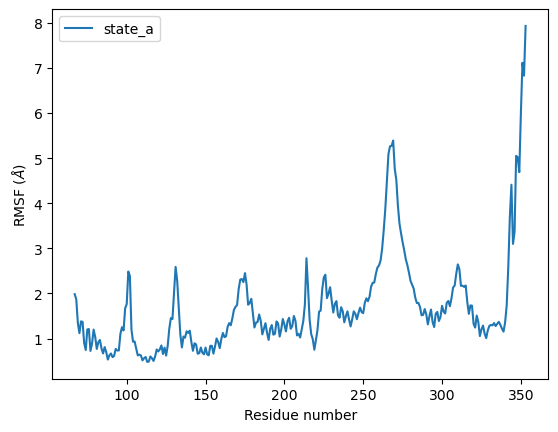

In [45]:
plt.plot(gpcr_atoms.resids, R.results.rmsf, label=state_name)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend()

In [42]:
# store the average position
ref.atoms.write(f'test/{state_name}_avg.pdb')

In [43]:
# save rmsf
rmsf_values = R.results.rmsf
with open(f'test/{state_name}_rmsf.txt', 'w') as f:
    for resid, rmsf in zip(gpcr_atoms.resids, rmsf_values):
        f.write(f'{resid} {rmsf}\n')

In [44]:
!cat test/state_a_rmsf.txt

67 1.9850420286394022
68 1.8681822428177604
69 1.345584831002371
70 1.1202794708523185
71 1.382643629544279
72 1.3712387446561924
73 0.9011127048570317
74 0.746919453862298
75 1.2025678796025905
76 1.2124358658513188
77 0.7265030854813961
78 0.8902876551421944
79 1.199946141124698
80 1.0399720442879885
81 0.7708550253248576
82 0.9206707945327222
83 0.9698466145190576
84 0.7807600300278424
85 0.6712725550076246
86 0.8119946180728611
87 0.7007263922608483
88 0.5357758122111185
89 0.6276572958485358
90 0.6702776687886545
91 0.5886008458229687
92 0.6168449641622836
93 0.7709268233197787
94 0.7359999552962532
95 0.7365588030812974
96 1.1088460966226166
97 1.2518674432511492
98 1.180730381141941
99 1.6706069685155545
100 1.7662794854756283
101 2.486954387378915
102 2.3893775886483883
103 1.2029034779569963
104 0.9299708185411615
105 0.9368172727413643
106 0.7845642667730197
107 0.6268887327027018
108 0.6458622124177461
109 0.6261552646137096
110 0.5168500985270102
111 0.5643964108017278
112 